In [19]:
import urllib.request as urlopen
import pandas as pd
import datetime
import numpy as np
import os
today = str(datetime.datetime.now().date())
print(today)
%matplotlib inline

2017-10-03


In [45]:
#https://finance.google.com/finance/getprices?q=HM-B&p=10d&f=d,o,h,l,c,v
def GoogleIntradayQuote(Quotes,interval_seconds,period_length,period):
    df = pd.DataFrame(columns=['datetime','stock','open','high','low','close','volume'])
    exchange = 'STO'
    for Quote in Quotes:
        url_string = "http://finance.google.com/finance/getprices?q={0}&x={1}".format(Quote,exchange)
        url_string += "&p={0}{1}&i={2}&f=d,o,h,l,c,v".format(period_length,period,interval_seconds)
        print(url_string)
        csv = urlopen.urlopen(url_string).readlines()
        csv = [x.decode("utf-8") for x in csv]
        for bar in range(7,len(csv)):
            if csv[bar].count(',')!=5:
                continue
            offset,close,high,low,open_,volume = csv[bar].split(',')
            if offset[0]=='a':
                day = float(offset[1:])
                offset = 0
            else:
                offset = float(offset)
            open,high,low,close,volume = [float(x) for x in [open_,high,low,close,volume]]
            dt = datetime.datetime.fromtimestamp(day+(interval_seconds*offset))
            df2 = pd.DataFrame([[dt,Quote,open,high,low,close,volume]],columns=['datetime','stock','open','high','low','close','volume'])
            df = df.append(df2,ignore_index = True)
    return df, url_string

In [53]:
Quotes = ['FING-B','SSAB-B']
period_length = 1
period = 'Y'
interval_min = 60*24
interval_sec = 60*interval_min
df, url_string = GoogleIntradayQuote(Quotes,interval_sec,period_length,period)
print(df.head())
from_date = str(df['datetime'].min().date())
to_date = str(df['datetime'].max().date())
days = np.busday_count(from_date,to_date)+1
print('ticks:',df.shape[0])
print('from:', from_date)
print('to:', to_date)
print('days:', days)

http://finance.google.com/finance/getprices?q=FING-B&x=STO&p=1Y&i=86400&f=d,o,h,l,c,v
http://finance.google.com/finance/getprices?q=SSAB-B&x=STO&p=1Y&i=86400&f=d,o,h,l,c,v
             datetime   stock    open    high    low   close      volume
0 2016-10-03 17:30:00  FING-B  101.00  101.50  99.30   99.80   2840234.0
1 2016-10-04 17:30:00  FING-B  100.00  100.90  99.00   99.80   3377179.0
2 2016-10-05 17:30:00  FING-B  100.20  101.00  99.25  100.20   4156429.0
3 2016-10-06 17:30:00  FING-B   99.75   99.85  95.25   96.25  11570839.0
4 2016-10-07 17:30:00  FING-B   97.00   97.20  94.10   95.40   6092416.0
from: 2016-10-03
to: 2017-10-02
days: 261


In [65]:
filename = 'quote='
for Quote in Quotes:
    filename = filename+Quote
filename = filename+'&start='+from_date+'&end='+to_date+'&interval='+str(interval_min)+'min'
print(filename)
df.to_pickle(os.path.join('data',filename+'.pkl'))

quote=FING-BSSAB-B&start=2016-10-03&end=2017-10-02&interval=1440min


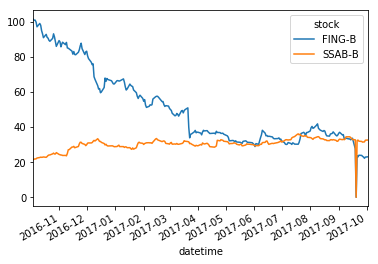

In [64]:
df[['datetime','stock','high']].groupby(['datetime','stock'])['high'].sum().unstack().plot()